In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the online file by the URL provides above, and assign it to variable "df"
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path,header=None)  # No headings for this data 

In [3]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.to_csv("cars.csv",index=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

### Remove rows with ? in  price 

In [7]:
df[df['price'] == '?']   ## rows with ? in price

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [8]:
# Drop rows with ? in price 
df.drop(df.loc[df['price'] == '?'].index, axis=0, inplace=True)

In [9]:
df.shape

(201, 26)

In [10]:
# Change type of price from object to float 
df['price'] = df['price'].astype('float')

## Univariate Analysis

In [13]:
# pick up only required fields 
features = ['make','fuel-type','num-of-doors','body-style','drive-wheels','engine-size','horsepower','city-mpg','highway-mpg','price']
cars = df.loc[: , features]

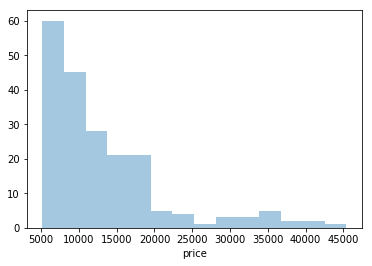

In [15]:
sns.distplot(cars['price'], kde=False)

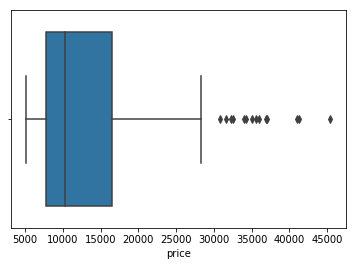

In [16]:
sns.boxplot(cars['price'])

In [ ]:
cars.info()

In [ ]:
cars['fuel-type'].value_counts()

In [17]:
cars['make'].unique().size

22

In [18]:
cars['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

In [ ]:
# Understand distribution of make
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.countplot(cars['make'])

In [ ]:
g = cars[['make','price']].groupby('make', as_index = False).mean()
print(g)
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(g['make'], g['price'])

In [ ]:
# Understand distribution of fuel-type
sns.countplot(cars['fuel-type'])

In [ ]:
# Understand distribution of fuel-type
sns.countplot(cars['body-style'])

In [ ]:
# Understand distribution of fuel-type
sns.countplot(cars['num-of-doors'])

In [ ]:
# Understand distribution of engine-size
sns.boxplot(cars['engine-size'])

In [ ]:
g = cars[['make','engine-size']].groupby('make', as_index = False).mean()
#print(g)
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(g['make'], g['engine-size'])

In [ ]:
# Understand distribution of city-mpg
sns.distplot(cars['city-mpg'],kde=False)

In [ ]:
# Understand distribution of highway-mpg
sns.distplot(cars['highway-mpg'], kde=False)

## Assignments of 1-May

In [22]:
col_q_count = cars.apply(lambda v : np.sum(v == '?')) # Apply lambda for each column 
print(col_q_count)
print(col_q_count.sum())

make            0
fuel-type       0
num-of-doors    2
body-style      0
drive-wheels    0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           0
dtype: int64
4


In [32]:
cars.groupby('make')['num-of-doors'].value_counts()

make           num-of-doors
alfa-romero    two              3
audi           four             5
               two              1
bmw            four             5
               two              3
chevrolet      two              2
               four             1
dodge          four             4
               two              4
               ?                1
honda          two              8
               four             5
isuzu          four             1
               two              1
jaguar         four             2
               two              1
mazda          two              9
               four             7
               ?                1
mercedes-benz  four             5
               two              3
mercury        two              1
mitsubishi     two              9
               four             4
nissan         four             9
               two              9
peugot         four            11
plymouth       four             4
               two  

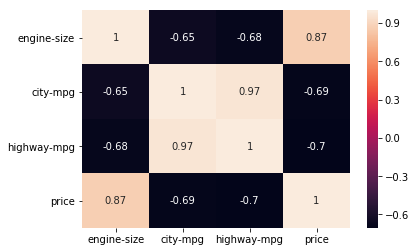

In [24]:
no_q = cars [ cars != '?']
sns.heatmap(no_q.corr(), annot=True)

    body-style         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback   9957.441176
3        sedan  14459.755319
4        wagon  12371.960000


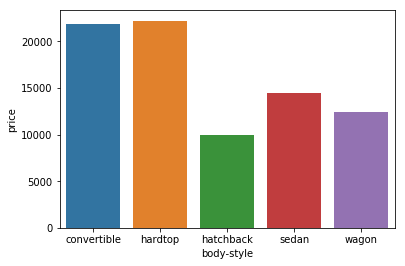

In [33]:
g = cars.groupby('body-style', as_index=False)['price'].mean()
print(g)
sns.barplot(x='body-style',y ='price', data=g)

## Bi-variate Analysis

In [ ]:
## Compare make with price 
g = cars.groupby('make', as_index=False)['price'].mean()

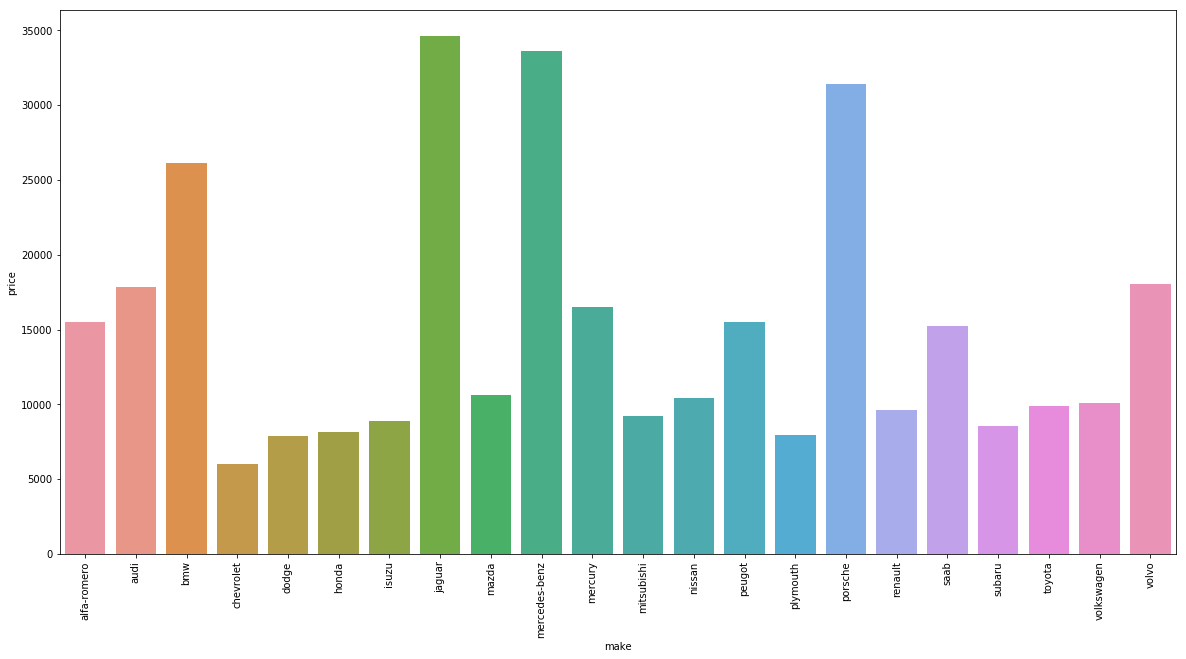

In [25]:
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.barplot(y='price',x ='make', data=g)

             make   city-mpg  highway-mpg
0     alfa-romero  20.333333    26.666667
1            audi  19.333333    24.500000
2             bmw  19.375000    25.375000
3       chevrolet  41.000000    46.333333
4           dodge  28.000000    34.111111
5           honda  30.384615    35.461538
6           isuzu  24.000000    29.000000
7          jaguar  14.333333    18.333333
8           mazda  25.705882    31.941176
9   mercedes-benz  18.500000    21.000000
10        mercury  19.000000    24.000000
11     mitsubishi  24.923077    31.153846
12         nissan  27.000000    32.944444
13         peugot  22.454545    26.636364
14       plymouth  28.142857    34.142857
15        porsche  17.500000    25.500000
16        renault  23.000000    31.000000
17           saab  20.333333    27.333333
18         subaru  26.333333    30.750000
19         toyota  27.500000    32.906250
20     volkswagen  28.583333    34.916667
21          volvo  21.181818    25.818182


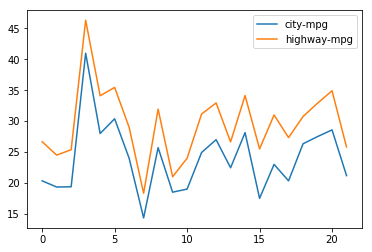

In [35]:
## Compare city-mpg and highway-mpg for each make 
g = cars.groupby('make', as_index=False)['city-mpg','highway-mpg'].mean()
print(g)
g.plot()

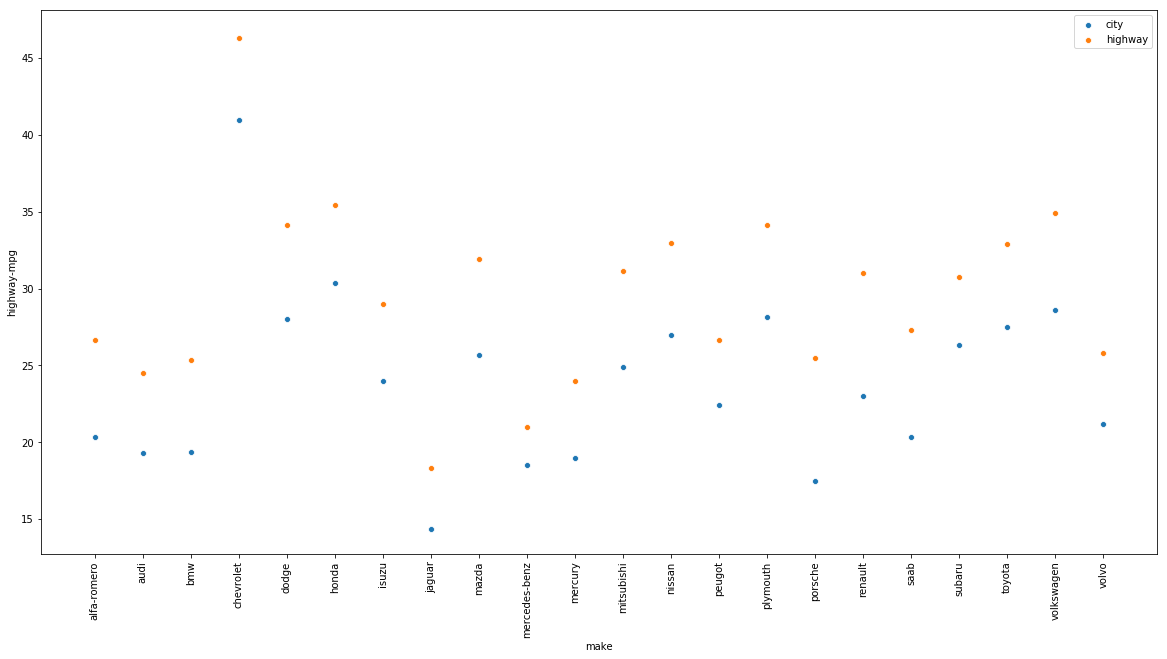

In [27]:
g = cars.groupby('make', as_index=False)['city-mpg','highway-mpg'].mean()
plt.gcf().set_size_inches(20,10)
plt.xticks( rotation = 'vertical')
sns.scatterplot( y = 'city-mpg', x = "make", data = g, label="city")
sns.scatterplot( y = 'highway-mpg', x = 'make', data = g , label = 'highway')

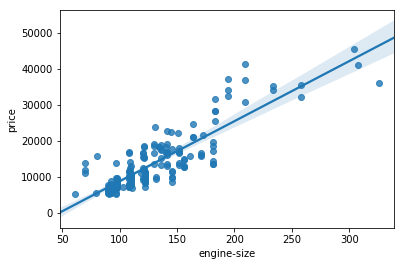

In [28]:
# Compare Engine size with price 
sns.regplot(x ="engine-size", y = 'price', data = cars)

d:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


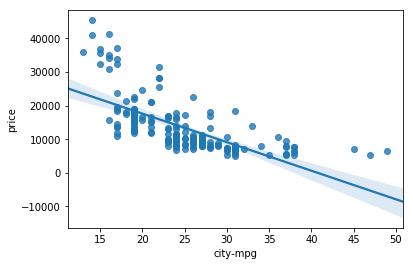

In [36]:
# Compare city-mpg with price 
sns.regplot(x ="city-mpg", y = 'price', data = cars)

## Handling missing or incorrect values 

In [29]:
cars.describe(include='all')

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-size,horsepower,city-mpg,highway-mpg,price
count,201,201,201,201,201,201.000000,201,201.000000,201.000000,201.000000
unique,22,2,3,5,3,NaN,59,NaN,NaN,NaN
top,toyota,gas,four,sedan,fwd,NaN,68,NaN,NaN,NaN
freq,32,181,113,94,118,NaN,19,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,126.875622,NaN,25.179104,30.686567,13207.129353
std,NaN,NaN,NaN,NaN,NaN,41.546834,NaN,6.423220,6.815150,7947.066342
min,NaN,NaN,NaN,NaN,NaN,61.000000,NaN,13.000000,16.000000,5118.000000
25%,NaN,NaN,NaN,NaN,NaN,98.000000,NaN,19.000000,25.000000,7775.000000
50%,NaN,NaN,NaN,NaN,NaN,120.000000,NaN,24.000000,30.000000,10295.000000
75%,NaN,NaN,NaN,NaN,NaN,141.000000,NaN,30.000000,34.000000,16500.000000


## Remove ? from num-of-doors 

In [37]:
# Remove ? from no. of doors
cars['num-of-doors'].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [38]:
# Replace ? in no-of-doors with four as that is mode 
cars.loc[cars['num-of-doors'] == '?', 'num-of-doors'] = cars['num-of-doors'].mode()[0]

In [39]:
cars['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

## Remove ? from horsepower 

In [40]:
cars.loc[cars['horsepower'] == '?', 'horsepower'].count()

2

In [42]:
hp_median = cars.loc[cars['horsepower'] != '?', 'horsepower'].median()
# Not applicable as there are ? in column
# hp_mean = cars.loc[cars['horsepower'] != '?', 'horsepower'].mean()
print(hp_median,hp_mean)

95.0 inf


In [43]:
# replace ? in horsepower with median()
cars.loc[ cars['horsepower'] == '?', 'horsepower'] = hp_median

In [44]:
cars['horsepower'] = cars['horsepower'].astype('float')

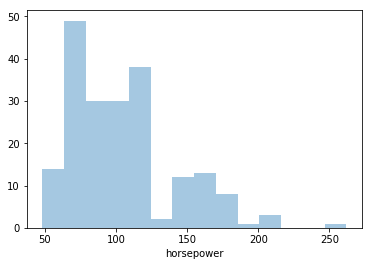

In [45]:
sns.distplot( cars['horsepower'],kde=False)

In [46]:
cars.shape

(201, 10)

In [54]:
col_q_count = cars.apply(lambda v : np.sum(v == '?'))
col_q_count

make            0
fuel-type       0
num-of-doors    0
body-style      0
drive-wheels    0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
dtype: int64

In [55]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 10 columns):
make            201 non-null object
fuel-type       201 non-null object
num-of-doors    201 non-null object
body-style      201 non-null object
drive-wheels    201 non-null object
engine-size     201 non-null int64
horsepower      201 non-null float64
city-mpg        201 non-null int64
highway-mpg     201 non-null int64
price           201 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 17.3+ KB


## Data transformation 

In [79]:
cars.head()

,engine-size,horsepower,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,27,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,27,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,26,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,30,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,22,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [56]:
#Convert categorical variables to dummies
cars = pd.get_dummies(cars)

In [57]:
cars.columns

Index(['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [58]:
cars.shape

(201, 39)

In [59]:
## create X and Y
y = cars['price']
X = cars 
X.drop(columns=['price'], inplace=True)

In [43]:
X.head()

,engine-size,horsepower,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,27,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,27,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,26,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,30,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,22,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [60]:
X.shape,y.shape

((201, 38), (201,))

## Build model using LinearRegression

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [65]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
print(X.columns)
print(model.coef_)

Index(['engine-size', 'horsepower', 'city-mpg', 'highway-mpg',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')
[ 6.33989092e+01  5.06633744e+01 -6.32521289e+01 -4.27084050e+00
 -2.40093703e+03  3.97020979e+03  7.04837997e+03 -8.12060453e+02
 -2.80052560e+03 -1.78369867e+03 -3.44496747e+03  6.60744567e+02
 -8.30576226e+02  9.46518757e+03 -2.16117040e+03 -3.64039729

In [68]:
model.intercept_

3770.1911092158825

In [69]:
y_pred = model.predict(X_test)

In [70]:
model.score(X_test,y_test)

0.9140680034132762

In [71]:
## get MSE 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 6511092.46
R2 Score: 0.91
Mean Absolute Error : 1778.72


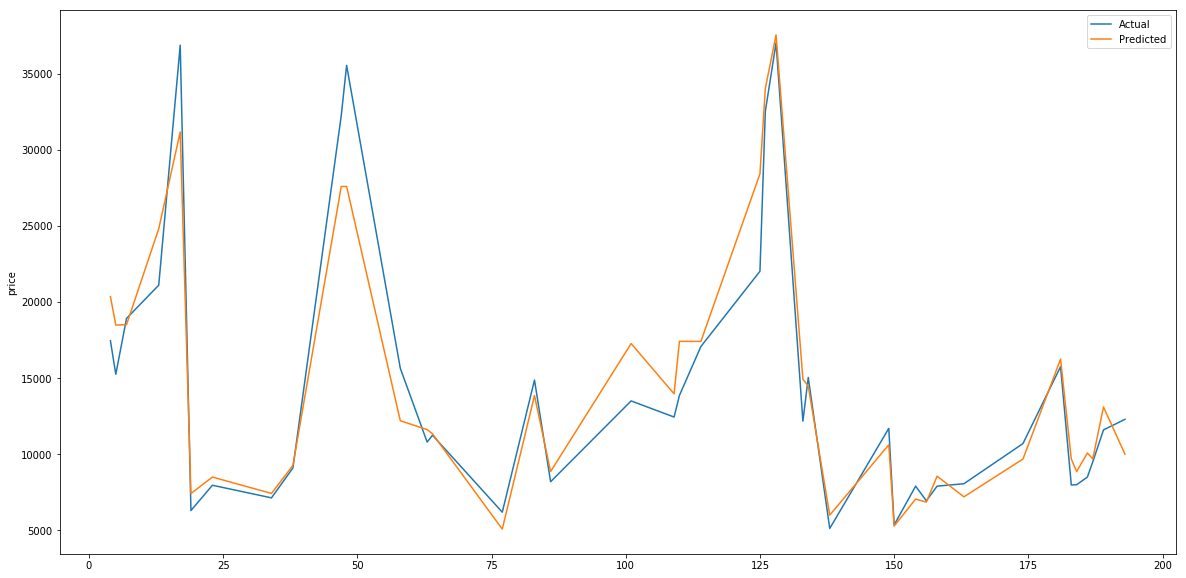

In [72]:
# Compare actual and predicted values
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [73]:
## SGD - Stochastic Gradient Descent
from sklearn.svm import LinearSVR 
model = LinearSVR()
model.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [57]:
y_pred = model.predict(X_test)

In [58]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.77


## RandomForestRegressor 

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.94


d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
